In [214]:
import glob, cv2
import matplotlib.pyplot as plt
import numpy as np

def aug_rotate_90(image):
    print(image.shape)
    return np.transpose(image, (1, 0, 2))

def aug_horizontal_flip(image):
    return np.flip(image, axis=1)

def aug_vertical_flip(image):
    return np.flip(image, axis=0)

def aug_cut_out(image):
    width = np.random.randint(1, image.shape[0])//2
    height = np.random.randint(1, image.shape[1])//2
    start_width = np.random.randint(1, image.shape[0]-width)
    start_height = np.random.randint(1, image.shape[1]-height)
    image[start_width:start_width+width, start_height:start_height+height, :] = 0
    return image

def aug_add_gaussian_noise(image, mean=0, std=1.0):
    noisy_image = image + image * np.random.normal(mean, std, image.shape)
    noisy_image = np.clip(noisy_image, 0, 255)  
    return noisy_image.astype(np.uint8)

def aug_solarization(image):
    brightness_factor = 0.1 * (np.random.random(1).item() - 0.5)
    contrast_factor = 1.5 + 0.1 * (np.random.random(1).item() - 0.5)
    solarized_image = (image + brightness_factor) * contrast_factor
    solarized_image = np.clip(solarized_image, 0, 255)  
    return solarized_image.astype(np.uint8)

def aug_brightness(image):
    brightness_factor = (np.random.random(1).item() - 0.5)
    image = image + brightness_factor
    return (image + brightness_factor).astype(np.uint8)

def aug_contrast(image):
    contrast_factor = 1.0 + (np.random.random(1).item() - 0.5)
    return np.clip(image*contrast_factor, 0, 255).astype(np.uint8)

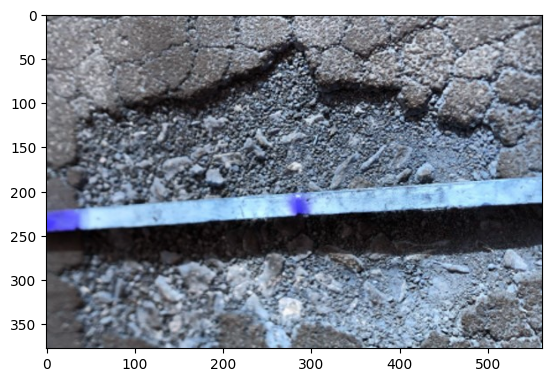

In [215]:
image = cv2.imread("data/train_images/train_images/p101.jpg")
plt.imshow(aug_brightness(image), vmin=0, vmax=255)
plt.show()

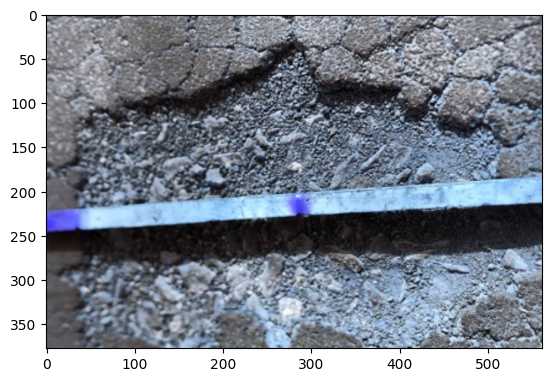

In [193]:
image = cv2.imread("data/train_images/train_images/p101.jpg")
plt.imshow(image, vmin=0, vmax=255)
plt.show()

# Generate data from annotated data

Download the annotations file in YOLO pytorch format, unzip, copy file and rename to annotated_data/

Run each code block, ensuring that the file paths are correct


In [1]:
import os
import csv
import cv2
import glob

## Training data

In [2]:
# Paths
csv_file_path_train = "annotated_data/train/_annotations.csv"
image_folder_path_train = "annotated_data/train/"
output_image_folder_train = "data_2/train_images/"
output_annotation_folder = "data_2/train_annotations/"

# Create output directories if they don't exist
os.makedirs(output_image_folder_train, exist_ok=True)
os.makedirs(output_annotation_folder, exist_ok=True)

# Read CSV file
with open(csv_file_path_train, "r") as csv_file:
    lines = csv_file.readlines()[1:]

annotations_dict = {}

for line in lines:
    image_name, width, height, class_id, xmin, ymin, xmax, ymax = line.strip().split(",")
    image_number, _, version, _ = image_name.rsplit(".")
    image_number = image_number.rsplit("_")[0]

    if class_id == "L":
        class_id = 1
    elif class_id == "potholes":
        class_id = 0

    img_width, img_height = int(width), int(height)
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)

    x_center = (xmin + xmax) / 2.0 / img_width
    y_center = (ymin + ymax) / 2.0 / img_height
    width = (xmax - xmin) / img_width
    height = (ymax - ymin) / img_height

    if image_number not in annotations_dict:
        annotations_dict[image_number] = {}

    annotations_dict[image_number][version] = annotations_dict[image_number].get(version, []) + [
        [class_id, x_center, y_center, width, height]
    ]

# Save images and annotations
for image_path in glob.glob(os.path.join(image_folder_path_train, "*.jpg")):
    image_name = os.path.basename(image_path)
    image_number, _, version, _ = image_name.rsplit(".")
    image_number = image_number.rsplit("_")[0]

    # Save image
    image = cv2.imread(image_path)
    output_image_path = os.path.join(output_image_folder_train, f"{image_number}_{version}.jpg")
    cv2.imwrite(output_image_path, image)

    # Save annotations
    if image_number in annotations_dict and version in annotations_dict[image_number]:
        output_annotation_path = os.path.join(output_annotation_folder, f"{image_number}_{version}.txt")
        with open(output_annotation_path, 'w', newline='') as outfile:
            writer = csv.writer(outfile, delimiter=' ')
            for annotation in annotations_dict[image_number][version]:
                writer.writerow(annotation)

print("Processing complete!")


Processing complete!


# Validation data

In [4]:
csv_file_path_valid = "annotated_data/valid/_annotations.csv"
image_folder_path_valid = "annotated_data/valid/"

# Read CSV file
with open(csv_file_path_valid, "r") as csv_file:
    lines = csv_file.readlines()[1:]

annotations_dict = {}

for line in lines:
    image_name, width, height, class_id, xmin, ymin, xmax, ymax = line.strip().split(",")
    image_number, _, version, _ = image_name.rsplit(".")
    image_number = image_number.rsplit("_")[0]

    if class_id == "L":
        class_id = 1
    elif class_id == "potholes":
        class_id = 0

    img_width, img_height = int(width), int(height)
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)

    x_center = (xmin + xmax) / 2.0 / img_width
    y_center = (ymin + ymax) / 2.0 / img_height
    width = (xmax - xmin) / img_width
    height = (ymax - ymin) / img_height

    if image_number not in annotations_dict:
        annotations_dict[image_number] = {}

    annotations_dict[image_number][version] = annotations_dict[image_number].get(version, []) + [
        [class_id, x_center, y_center, width, height]
    ]

# Save images and annotations
for image_path in glob.glob(os.path.join(image_folder_path_valid, "*.jpg")):
    image_name = os.path.basename(image_path)
    image_number, _, version, _ = image_name.rsplit(".")
    image_number = image_number.rsplit("_")[0]

    # Save image
    image = cv2.imread(image_path)
    output_image_path = os.path.join(output_image_folder_train, f"{image_number}_{version}.jpg")
    cv2.imwrite(output_image_path, image)

    # Save annotations
    if image_number in annotations_dict and version in annotations_dict[image_number]:
        output_annotation_path = os.path.join(output_annotation_folder, f"{image_number}_{version}.txt")
        with open(output_annotation_path, 'w', newline='') as outfile:
            writer = csv.writer(outfile, delimiter=' ')
            for annotation in annotations_dict[image_number][version]:
                writer.writerow(annotation)

print("Processing complete!")


Processing complete!


# Test data

In [5]:
image_folder_path_test = "annotated_data/test/"
output_image_folder_test = "data_2/test_images/"

os.makedirs(output_image_folder_test, exist_ok=True)

# Save images and annotations
for image_path in glob.glob(os.path.join(image_folder_path_test, "*.jpg")):
    image_name = os.path.basename(image_path)
    image_number, _, version, _ = image_name.rsplit(".")
    image_number = image_number.rsplit("_")[0]

    # Save image
    image = cv2.imread(image_path)
    output_image_path = os.path.join(output_image_folder_test, f"{image_number}_{version}.jpg")
    cv2.imwrite(output_image_path, image)